In [1]:
import pandas as pd
import os

In [2]:
DEFAULT_MIN_AGE = 18
DEFAULT_MAX_AGE = 100
DEFAULT_NAME_MIN_LENGTH = 3
DEFAULT_PIN_MIN_LENGTH = 6
DEFAULT_ID_MIN_LENGTH = 4

csvs_path = '../parseData/csvs/delhi/'
files = os.listdir(csvs_path)
COLUMNS = ['file_name','total_records_found','no_of_missing_records','no_of_males_found','no_of_males_claimed','no_of_females_found','no_of_females_claimed','age_pass_cases','age_fail_cases',
           'elector_name_length_pass_cases','elector_name_length_fail_cases','father_or_husband_name_length_pass_cases','father_or_husband_name_length_fail_cases','id_length_pass_cases','id_length_fail_cases',
          'unique_sex_values','unique_relationship','unique_main_town','unique_mandal','unique_district','unique_pin_code','unique_ac_name','unique_parl_constituency','unique_police_station',
          'unique_revenue_division']

In [3]:
def get_total_records_found():
    total_records_found = len(df)
    return total_records_found

def get_no_of_missing_records():
    
    if df['net_electors_total'][0]>= len(df):
        no_of_missing_records = df['net_electors_total'][0] - len(df)
        return no_of_missing_records
    else:
        return 0


def get_no_of_males_found():
    temp_df = df[(df['sex']=='MALE')]
    return len(temp_df)

def get_no_of_females_found():
    temp_df = df[(df['sex']=='FEMALE')]
    return len(temp_df)

def get_no_of_males_claimed():
    if df['net_electors_male'][0]:
        return df['net_electors_male'][0]
    
def get_no_of_females_claimed():
    if df['net_electors_female'][0]:
        return df['net_electors_female'][0]

def get_age_pf_cases(total_records):
    temp_df = df[(DEFAULT_MIN_AGE <= df['age']) & (df['age'] <= DEFAULT_MAX_AGE)]
    
    return len(temp_df), total_records-len(temp_df)

def get_ename_pf_cases(total_records):
    temp_df = df[(DEFAULT_NAME_MIN_LENGTH <= df['elector_name'].str.len())]
    return len(temp_df), total_records-len(temp_df)

def get_fhname_pf_cases(total_records):
    temp_df = df[(DEFAULT_NAME_MIN_LENGTH <= df['father_or_husband_name'].str.len())]
    return len(temp_df), total_records-len(temp_df)

def get_id_length_pf_cases(total_records):
    temp_df = df[(DEFAULT_ID_MIN_LENGTH <= df['id'].str.len())]
    return len(temp_df), total_records-len(temp_df)

def missing_to_typecast(column,default_value,datatype):
    df[column] = df[column].fillna(default_value)
    df[column] = df[column].astype(datatype)

def get_unique_list(column):
    unique_list = df[column].unique()
    
    return unique_list

def save_to_csv(dataframe, full_filepath):
    
    if dataframe.empty:
        return 
    else :       
        dataframe.to_csv(full_filepath,index=False)

In [4]:
stat_df = pd.DataFrame(columns = COLUMNS)

for file in files:
    
    if not file.endswith('csv'):
        continue
    
    df = pd.read_csv(csvs_path+file,low_memory=False)
    
    missing_to_typecast('age',0,'int')
    missing_to_typecast('net_electors_male',0,'int')
    missing_to_typecast('net_electors_female',0,'int')
    missing_to_typecast('net_electors_total',0,'int')
    
    total_records_found = get_total_records_found()
    no_of_missing_records = get_no_of_missing_records()
    no_of_males_found = get_no_of_males_found()
    no_of_males_claimed = get_no_of_males_claimed()
    no_of_females_found = get_no_of_females_found()
    no_of_females_claimed = get_no_of_females_claimed()
    age_pass_cases,age_fail_cases = get_age_pf_cases(total_records_found)
    elector_name_length_pass_cases,elector_name_length_fail_cases = get_ename_pf_cases(total_records_found)
    father_or_husband_name_length_pass_cases,father_or_husband_name_length_fail_cases = get_fhname_pf_cases(total_records_found)
    id_length_pass_cases,id_length_fail_cases = get_id_length_pf_cases(total_records_found)
    unique_sex_values = get_unique_list('sex')
    unique_relationship = get_unique_list('relationship')
    
    final_list = [file,total_records_found,no_of_missing_records,no_of_males_found,no_of_males_claimed,
                no_of_females_found,no_of_females_claimed,age_pass_cases,age_fail_cases,elector_name_length_pass_cases,elector_name_length_fail_cases,
                father_or_husband_name_length_pass_cases,father_or_husband_name_length_fail_cases,
                id_length_pass_cases,id_length_fail_cases,unique_sex_values,unique_relationship,
                df['main_town'][0],df['mandal'][0],df['district'][0],df['pin_code'][0],df['ac_name'][0],df['parl_constituency'][0],df['police_station'][0],df['revenue_division'][0]]

    df_length = len(stat_df)
    stat_df.loc[df_length] = final_list
    
    print("new row has been added ",file)

new row has been added  U05A28P3.csv
new row has been added  U05A64P44.csv
new row has been added  U05A1P1.csv
new row has been added  U05A47P100.csv
new row has been added  U05A44P60.csv
new row has been added  U05A47P31.csv
new row has been added  U05A1P14.csv
new row has been added  U05A44P77.csv
new row has been added  U05A64P2.csv
new row has been added  U05A64P6.csv
new row has been added  U05A44P71.csv
new row has been added  U05A28P20.csv
new row has been added  U05A64P66.csv
new row has been added  U05A47P1.csv


In [5]:
stat_df

,file_name,total_records_found,no_of_missing_records,no_of_males_found,no_of_males_claimed,no_of_females_found,no_of_females_claimed,age_pass_cases,age_fail_cases,elector_name_length_pass_cases,...,unique_sex_values,unique_relationship,unique_main_town,unique_mandal,unique_district,unique_pin_code,unique_ac_name,unique_parl_constituency,unique_police_station,unique_revenue_division
0,U05A28P3.csv,1452,0,699,709,725,729,1423,29,1452,...,"[MALE, FEMALE, nan]","[father, husband, nan, mother]",Delhi,PATEL NAGAR,WEST,110058,28 - HARI NAGAR (GEN,6A WEST nFi Hi {GEN,JANAKPURI,2
1,U05A64P44.csv,932,9,487,498,430,443,917,15,897,...,"[MALE, FEMALE, nan]","[father, husband, mother, nan]",Delhi,SHAHDARA,SHAHDARA,110093,64 - ROHTAS NAGAR (GEN),2- NORTH EAST DELHI (GEN),JYOTI NAGAR,36E
2,U05A1P1.csv,902,6,492,498,400,410,893,9,900,...,"[MALE, FEMALE, nan]","[father, husband, mother, nan]",Delhi,NARELA,NORTH,110040,1 - NERELA GEN,l\ Hil oc },NARELA,SN
3,U05A47P100.csv,744,0,433,433,310,310,743,1,728,...,"[MALE, FEMALE, nan]","[father, husband, nan, mother]",Delhi,HAUZ KHAS,SOUTH,110062,47 - DEOLI(S,7- SOUTH DELHI (GEN),SANGAM VIHAR,765
4,U05A44P60.csv,1240,0,667,687,531,542,1199,41,1194,...,"[MALE, FEMALE, nan]","[father, husband, mother, nan]",Delhi,VASANT VIHAR,NEW DELHI,110022,44-R K PUR. (GEN),4- NEW DELHI (GEN),SECTOR-12 R K PU,65
5,U05A47P31.csv,687,0,334,334,346,346,680,7,678,...,"[FEMALE, MALE, nan]","[husband, father, mother, nan]",Delhi,HAUZ KHAS,SOUTH,110062,47 - DEOLI(S,7- SOUTH DELHI (GEN),AMBEDKAR NAGAR,745
6,U05A1P14.csv,471,1,254,258,212,214,466,5,468,...,"[MALE, FEMALE, nan]","[father, husband, mother, nan]",Delhi,NARELA,NORTH,110040,1 - NERELA GEN,l\ Hil oc },NARELA,SN
7,U05A44P77.csv,1100,1,623,628,466,473,1089,11,1072,...,"[MALE, FEMALE, nan]","[father, husband, mother, nan]",Delhi,VASANT VIHAR,NEW DELHI,110066,44-R K PUR. (GEN),4- NEW DELHI (GEN),SECTOR-12 R K PU,66
8,U05A64P2.csv,923,0,464,463,449,454,913,10,883,...,"[FEMALE, MALE, nan]","[husband, father, nan, mother]",Delhi,SHAHDARA,SHAHDARA,110093,64 - ROHTAS NAGAR (GEN),2- NORTH EAST DELHI (GEN),JYOTI NAGAR,36E
9,U05A64P6.csv,878,0,473,473,400,403,873,5,854,...,"[MALE, FEMALE, nan]","[father, husband, mother, nan]",Delhi,SHAHDARA,SHAHDARA,110093,64 - ROHTAS NAGAR (GEN),2- NORTH EAST DELHI (GEN),JYOTI NAGAR,36E


<AxesSubplot:title={'center':'Age, Name, Id Pass/Fail cases'}, xlabel='file_name'>

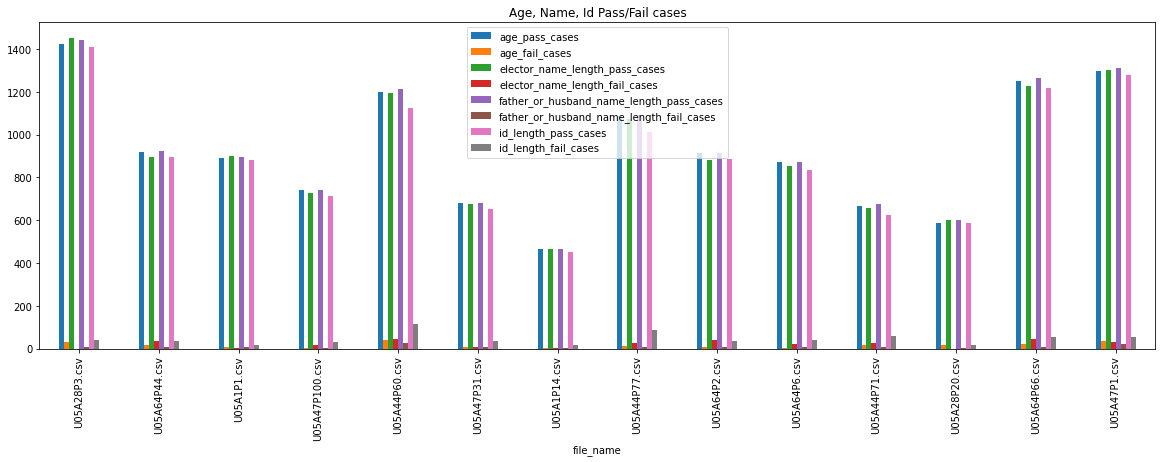

In [6]:
stat_df.plot(x="file_name",y=["age_pass_cases", "age_fail_cases","elector_name_length_pass_cases","elector_name_length_fail_cases","father_or_husband_name_length_pass_cases","father_or_husband_name_length_fail_cases",
             "id_length_pass_cases","id_length_fail_cases"], kind="bar",figsize=(20,6),title='Age, Name, Id Pass/Fail cases')


<AxesSubplot:xlabel='file_name'>

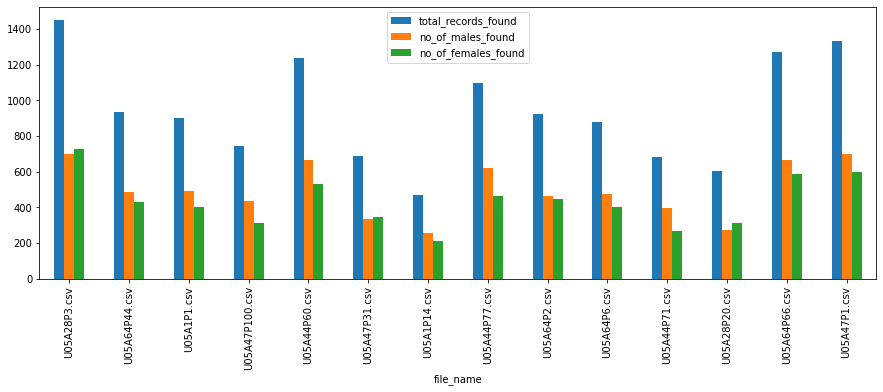

In [7]:
stat_df.plot(x="file_name", y=["total_records_found","no_of_males_found","no_of_females_found"], kind="bar",figsize=(15,5))


In [8]:
total_unique_main_towns = len(stat_df['unique_main_town'].value_counts())
print("total unique main towns ",total_unique_main_towns)

total_unique_mandals = len(stat_df['unique_mandal'].value_counts())
print("total unique mandals ",total_unique_mandals)

total_unique_districts = len(stat_df['unique_district'].value_counts())
print("total unique districts ",total_unique_districts)

total_unique_pincodes = len(stat_df['unique_pin_code'].value_counts())
print("total unique pincodes ",total_unique_pincodes)

total_unique_ac_name = len(stat_df['unique_ac_name'].value_counts())
print("total unique ac names ",total_unique_ac_name)

total_unique_parl_constituency = len(stat_df['unique_parl_constituency'].value_counts())
print("total unique parl constituency ",total_unique_parl_constituency)

total_unique_police_station = len(stat_df['unique_police_station'].value_counts())
print("total unique police station ",total_unique_police_station)

total_unique_revenue_division = len(stat_df['unique_revenue_division'].value_counts())
print("total unique revenue division ",total_unique_revenue_division)



total unique main towns  1
total unique mandals  5
total unique districts  5
total unique pincodes  6
total unique ac names  5
total unique parl constituency  5
total unique police station  6
total unique revenue division  8


In [9]:
save_to_csv(stat_df,"final_test_delhi_report.csv")

In [10]:
df['net_electors_total'][0]

1295

In [11]:
len(df)

1334